In [1]:
%pylab inline
from landlab import RasterModelGrid
from landlab.plot.imshow import imshow_grid_at_node
from landlab.components import PresFlowNetwork, MeltCreep
import numpy as np
from matplotlib import colors,  cm
import matplotlib.animation as animation

from PIL import Image
from PIL import ImageDraw

def plot_links(grid, value_name, autoscale=True, 
               vmin=0., vmax=0., cmap_name='viridis', 
               magnitude= False, lw=5, 
               pixels_per_node=31, x_name='X', 
               y_name='Y', var_name='', use_PIL=True):#, logvalues=False ):
    if use_PIL:
        pixel_xscaling_factor = pixels_per_node/grid.dx
        pixel_yscaling_factor = pixels_per_node/grid.dy
        im = Image.new('RGBA', ( int(round(grid.number_of_cell_columns*pixels_per_node)), int(round(grid.number_of_cell_rows*pixels_per_node)) ), (255,255,255,255))
        draw = ImageDraw.Draw(im)

    link_head_x = grid.node_x[grid.node_at_link_head]
    link_head_y = grid.node_y[grid.node_at_link_head]
    link_tail_x = grid.node_x[grid.node_at_link_tail]
    link_tail_y = grid.node_y[grid.node_at_link_tail]       
    if magnitude:
        values = abs(grid.at_link[value_name])
    else:
        values = grid.at_link[value_name]
    #if logvalues:
    #    values = np.log10(abs(grid.at_link[value_name]))
    
    
    
    #Normalize color values
    if autoscale:
        cnorm = colors.Normalize()
        cnorm.autoscale(values)
    else:
        cnorm = colors.Normalize(vmin,vmax)
    scalarMap = cm.ScalarMappable(norm=cnorm, cmap = get_cmap(cmap_name))
    scalarMap.set_array(values)
    #set_cmap()
    if use_PIL:
        for i, value in enumerate(values):
            draw.line( ((link_head_x[i]*pixel_xscaling_factor,link_head_y[i]*pixel_yscaling_factor),(link_tail_x[i]*pixel_xscaling_factor,link_tail_y[i]*pixel_yscaling_factor)),fill=scalarMap.to_rgba(value,bytes=True),width=lw) 
        imshow(np.asarray(im), origin='lower', extent=(0,grid.number_of_cell_columns,0,grid.number_of_cell_rows))
    else:
        for i, value in enumerate(values):
            xs = [link_head_x[i],link_tail_x[i]]
            ys = [link_head_y[i],link_tail_y[i]]
            img = plot(xs,ys,lw=lw,color=scalarMap.to_rgba(value))    
    cb = colorbar(scalarMap)
    cb.ax.set_ylabel(var_name)
    xlabel(x_name)
    ylabel(y_name)


Populating the interactive namespace from numpy and matplotlib


In [2]:
mg = RasterModelGrid((5,10),100)
junc_elev = mg.add_zeros('node', 'junction__elevation')
R = mg.add_zeros('node', 'input__discharge')
h = mg.add_zeros('node', 'hydraulic__head')
Q = mg.add_zeros('link', 'conduit__discharge')
mg.add_zeros('node','storage')
mg.at_node['storage']=10.*np.ones(mg.number_of_nodes)

#mg.at_node['junction__elevation'] = -0.01*mg.node_x + 4.

w = mg.add_zeros('link','width')
mg.at_link['width']= 1.0*np.ones(mg.number_of_links)#.*np.random.rand(mg.number_of_active_links)

d_h = mg.add_zeros('link','hydraulic__diameter')
mg.at_link['hydraulic__diameter'] =  np.random.rand(mg.number_of_links)#mg.at_link['width'].copy()

#Set up link elevation offsets
xc_min_head = mg.add_zeros('link', 'conduit_head__offset')
xc_min_tail = mg.add_zeros('link', 'conduit_tail__offset')
y_max = mg.add_zeros('link', 'maximum__depth')
mg.at_link['maximum__depth']= mg.at_link['width']#applicable for square conduits

#print(mg.at_link['maximum__depth'])

#set heads at edges
h[mg.nodes_at_top_edge] = 0.
h[mg.nodes_at_bottom_edge] = 0.
h[mg.nodes_at_left_edge] = 10.
h[mg.nodes_at_right_edge] = 0.


mg.set_closed_boundaries_at_grid_edges(False,True,False,True)
Q[mg.active_links] = 0.1#0.1*np.random.rand(mg.number_of_active_links)
n_core = mg.number_of_core_nodes
links = mg.links_at_node
print("Number of links = ", mg.number_of_links)
print("Number of nodes = ", mg.number_of_nodes)
print("Number of active links = ", mg.number_of_active_links)
print("Number of core nodes = ", mg.number_of_core_nodes)

pfn = PresFlowNetwork(mg, cross_sections='circ')

for i in arange(500):
    print('Time iteration:', i)
    pfn.dyn_wave_solution(dt_min=5., outflow_bnd_type = 'normal')
 



Number of links =  85
Number of nodes =  50
Number of active links =  43
Number of core nodes =  24
Time iteration: 0
dt= 5.0    dt_h= 19.1486054296   dt_Cr= 3.42977446017
average dh= 0.000562741392591   average abs(dQ)= 0.0644768841342
num iters= 12
Time iteration: 1
average dh= 0.0203829908154   average abs(dQ)= 0.051316751916
num iters= 15
Time iteration: 2
average dh= 0.0496344046224   average abs(dQ)= 0.0412433060015
num iters= 18
Time iteration: 3
average dh= 0.0678574251047   average abs(dQ)= 0.0176582620601
num iters= 12
Time iteration: 4
average dh= 0.0720270210747   average abs(dQ)= 0.0104514358492
num iters= 12
Time iteration: 5
average dh= 0.0715418932598   average abs(dQ)= 0.0115077364675
num iters= 12
Time iteration: 6
average dh= 0.0693941207121   average abs(dQ)= 0.0117090398534
num iters= 13
Time iteration: 7
average dh= 0.0669819194355   average abs(dQ)= 0.0129372643627
num iters= 14
Time iteration: 8
average dh= 0.0647257323408   average abs(dQ)= 0.0108744995268
num 

average dh= 0.0230174471463   average abs(dQ)= 0.000764084290041
num iters= 10
Time iteration: 80
dt= 5.0    dt_h= 2.86757239197   dt_Cr= 29.7875925318
average dh= 0.0228160066406   average abs(dQ)= 0.000750839453258
num iters= 10
Time iteration: 81
average dh= 0.0226173744348   average abs(dQ)= 0.000750032805388
num iters= 10
Time iteration: 82
average dh= 0.0224212099645   average abs(dQ)= 0.000748825680505
num iters= 10
Time iteration: 83
average dh= 0.0222272586538   average abs(dQ)= 0.000747412634761
num iters= 10
Time iteration: 84
average dh= 0.0220355407332   average abs(dQ)= 0.000746942818608
num iters= 10
Time iteration: 85
average dh= 0.021845988767   average abs(dQ)= 0.000740218960458
num iters= 10
Time iteration: 86
average dh= 0.0216581558751   average abs(dQ)= 0.000731946141806
num iters= 10
Time iteration: 87
average dh= 0.0214719701447   average abs(dQ)= 0.000727478824208
num iters= 10
Time iteration: 88
average dh= 0.0212876564922   average abs(dQ)= 0.000717786865408


average dh= 0.012819871828   average abs(dQ)= 0.000471441423531
num iters= 9
Time iteration: 163
average dh= 0.0126471754724   average abs(dQ)= 0.000466023954698
num iters= 9
Time iteration: 164
average dh= 0.0124764067996   average abs(dQ)= 0.000461450606422
num iters= 9
Time iteration: 165
average dh= 0.0123075712219   average abs(dQ)= 0.000459530368672
num iters= 9
Time iteration: 166
average dh= 0.0121406632164   average abs(dQ)= 0.00045785814495
num iters= 9
Time iteration: 167
average dh= 0.0119759494   average abs(dQ)= 0.00045647959857
num iters= 8
Time iteration: 168
average dh= 0.0118133517518   average abs(dQ)= 0.000452155695284
num iters= 8
Time iteration: 169
average dh= 0.0116525257827   average abs(dQ)= 0.000446390068924
num iters= 8
Time iteration: 170
dt= 7.25801592082    dt_h= 7.25801592082   dt_Cr= 33.8283672598
average dh= 0.0114934997016   average abs(dQ)= 0.000433241398471
num iters= 8
Time iteration: 171
average dh= 0.0130718458653   average abs(dQ)= 0.00048440208

average dh= 0.00598188937606   average abs(dQ)= 5.51231261775e-05
num iters= 7
Time iteration: 252
average dh= 0.0059568134847   average abs(dQ)= 5.41547969078e-05
num iters= 7
Time iteration: 253
average dh= 0.00593228200738   average abs(dQ)= 5.32494316845e-05
num iters= 7
Time iteration: 254
average dh= 0.00590825813654   average abs(dQ)= 5.24036435934e-05
num iters= 7
Time iteration: 255
average dh= 0.00588470763957   average abs(dQ)= 5.16129718929e-05
num iters= 7
Time iteration: 256
average dh= 0.00586159912529   average abs(dQ)= 5.08733776198e-05
num iters= 7
Time iteration: 257
average dh= 0.00583890388099   average abs(dQ)= 5.01812966031e-05
num iters= 7
Time iteration: 258
average dh= 0.00581659563629   average abs(dQ)= 4.95332910709e-05
num iters= 7
Time iteration: 259
average dh= 0.00579465034006   average abs(dQ)= 4.89258668568e-05
num iters= 7
Time iteration: 260
dt= 9.19019457515    dt_h= 9.19019457515   dt_Cr= 34.710871041
average dh= 0.00577304596699   average abs(dQ)=

average dh= 0.004779859596   average abs(dQ)= 4.30794712209e-05
num iters= 7
Time iteration: 344
average dh= 0.0047653512472   average abs(dQ)= 4.34486897802e-05
num iters= 7
Time iteration: 345
average dh= 0.00475088740855   average abs(dQ)= 4.38676766063e-05
num iters= 7
Time iteration: 346
average dh= 0.00473646616301   average abs(dQ)= 4.4373898624e-05
num iters= 7
Time iteration: 347
average dh= 0.00472208546227   average abs(dQ)= 4.49659106245e-05
num iters= 7
Time iteration: 348
average dh= 0.00470774309232   average abs(dQ)= 4.56466405163e-05
num iters= 7
Time iteration: 349
average dh= 0.00469343663427   average abs(dQ)= 4.64362061143e-05
num iters= 7
Time iteration: 350
dt= 10.5139962563    dt_h= 10.5139962563   dt_Cr= 34.913761293
average dh= 0.00467916341175   average abs(dQ)= 4.73614967939e-05
num iters= 7
Time iteration: 351
average dh= 0.00486670955264   average abs(dQ)= 5.0606864455e-05
num iters= 7
Time iteration: 352
average dh= 0.00485123886233   average abs(dQ)= 5.2

average dh= 0.00425811140699   average abs(dQ)= 3.17795095299e-05
num iters= 7
Time iteration: 435
average dh= 0.00424320561506   average abs(dQ)= 3.16441974678e-05
num iters= 7
Time iteration: 436
average dh= 0.00422837061872   average abs(dQ)= 3.15093010783e-05
num iters= 7
Time iteration: 437
average dh= 0.0042136060573   average abs(dQ)= 3.13753058583e-05
num iters= 7
Time iteration: 438
average dh= 0.00419891154013   average abs(dQ)= 3.12423298921e-05
num iters= 7
Time iteration: 439
average dh= 0.00418428664763   average abs(dQ)= 3.11103216282e-05
num iters= 7
Time iteration: 440
dt= 12.0009858596    dt_h= 12.0009858596   dt_Cr= 34.7406427667
average dh= 0.00416973093976   average abs(dQ)= 3.09792406672e-05
num iters= 7
Time iteration: 441
average dh= 0.00408925685206   average abs(dQ)= 3.03603510246e-05
num iters= 7
Time iteration: 442
average dh= 0.004075291103   average abs(dQ)= 3.02336623306e-05
num iters= 7
Time iteration: 443
average dh= 0.00406139064707   average abs(dQ)= 

Node net fluxes =  [  3.28897278e-05   3.45691655e-05   9.38334659e-05   5.61092297e-03
   5.61074856e-03   5.60707431e-03   5.60852339e-03   5.59333644e-03
   2.33400316e-05   7.22998108e-05   9.47909137e-05   5.42526243e-03
   5.60854188e-03   5.60643799e-03   3.56973618e-03   3.55528362e-03
   2.33296867e-05   8.20744514e-05   3.31687471e-04   4.13522332e-04
   3.22905321e-03   3.36102310e-03   3.56962220e-03   3.55513125e-03]
Node head =  [ 10.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
  10.           9.9561242    9.95386287   9.87390766   3.7207558
   3.72076795   3.70585954   3.7008005    3.65021221   0.16255516
  10.           9.96838493   9.90208639   9.87252383   4.05275871
   3.72397296   3.70566981   3.39430086   3.37439447   0.12043924
  10.           9.9683901    9.8884778    9.54685104   9.43319776
   4.99302715   4.59814155   3.39418171   3.37446941   0.33995511
  10.           0.           0.           

Text(0, 0.5, 'D_H')

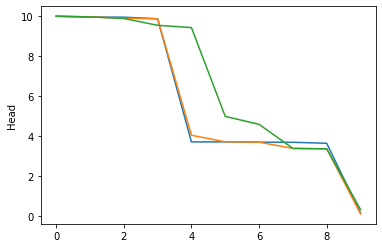

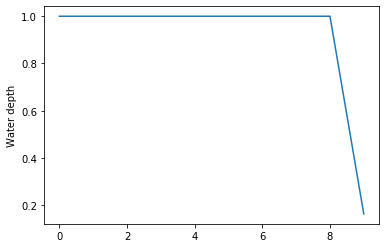

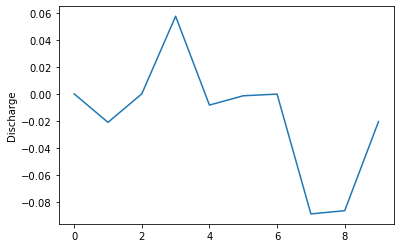

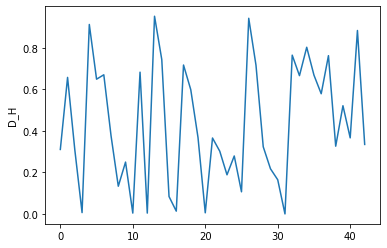

In [6]:
print("Node net fluxes = ",mg.calc_net_flux_at_node(Q)[mg.core_nodes]/mg.dx - mg.at_node['input__discharge'][mg.core_nodes])
print("Node head = ",h)

figure()
plot(h[10:20])
plot(h[20:30])
plot(h[30:40])
ylabel('Head')

print('Discharge=',Q[mg.active_links])
#Discharge from DW equation
L = max(mg.node_x)
deltaH = max(h[mg.nodes_at_left_edge]) - min(h[mg.nodes_at_right_edge])
f=0.1
g=9.8
D_H = 1. 
print('DW discharge = ', D_H**2.*sqrt(2*g*D_H*deltaH/f/L))


figure()
water_depth = mg.at_node['hydraulic__head'][10:20] - mg.at_node['junction__elevation'][10:20]
water_depth[water_depth>1.] = 1.
plot(water_depth)
ylabel('Water depth')


figure()
plot(Q[mg.active_links][10:20])
ylabel('Discharge')

figure()
plot(mg.at_link['hydraulic__diameter'][mg.active_links])
ylabel('D_H')



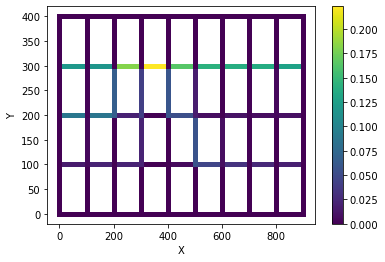

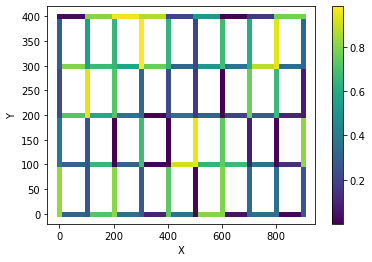

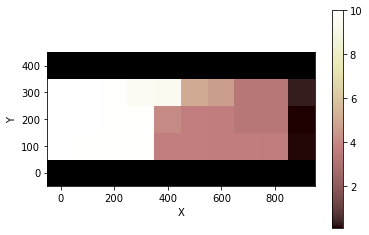

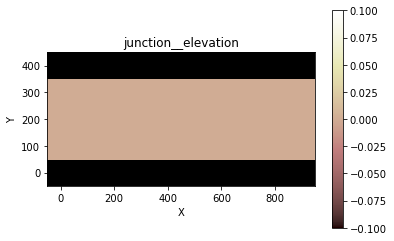

In [7]:
figure()
plot_links(mg, 'conduit__discharge',magnitude=True, use_PIL=False)
figure()
plot_links(mg, 'hydraulic__diameter', use_PIL=False)
figure()
imshow_grid_at_node(mg, h)
figure()
imshow_grid_at_node(mg, 'junction__elevation')


In [3]:
ymins = pfn.xc_y.min(axis=1)
fd = 0.25
ywet = fd + ymins
wet_compare = broadcast_to(ywet, pfn.xc_y.transpose().shape).transpose()

In [4]:
y = pfn.xc_y[pfn.xc_y<wet_compare]
x = pfn.xc_x[pfn.xc_y<wet_compare]


In [6]:
wantids = pfn.xc_y<wet_compare
al = mg.active_links

wantids = wantids[al]
xm = pfn.xc_xm[al]
x = pfn.xc_x[al]
ym = pfn.xc_ym[al]
y = pfn.xc_y[al]
xp = pfn.xc_xp[al]
yp = pfn.xc_yp[al]
sA = (xm*y - x*ym) * 0.5

sA[~wantids] = 0.
#sA.sum(axis=1).shape
l=hypot(x-xp,y-yp)

np.sum(l,axis=1).shape


(43,)

In [11]:
if type(wantids) == type(None):
    print('ok')
    
type(None)

NoneType

In [28]:
mg.at_node['xc'].shape

###Perhaps should use arrays assigned onto landlab grid directly rather than new XC object

#####Next step, write code to initialize a xc and calculate d_h


(50, 102)

In [30]:
test[0]

array([ 0.77098428,  0.99830551,  0.30540551,  0.16738251,  0.97547085,
        0.50562703,  0.3066864 ,  0.91680595,  0.75297932,  0.89573101,
        0.9789894 ,  0.22019379,  0.46192489,  0.52944941,  0.54894687,
        0.32878777,  0.08452175,  0.56110957,  0.19784226,  0.43651093,
        0.07500121,  0.7743863 ,  0.92028291,  0.54257637,  0.10737806,
        0.29654272,  0.45352767,  0.74517833,  0.68868763,  0.52853944,
        0.93739432,  0.77370938,  0.37612989,  0.10347197,  0.48148967,
        0.91079636,  0.51063425,  0.79151537,  0.22654909,  0.48952004,
        0.72264249,  0.36246573,  0.6133074 ,  0.33141574,  0.1679346 ,
        0.45132052,  0.00793738,  0.20381963,  0.04322713,  0.53853515,
        0.63317882,  0.21504866,  0.13715971,  0.51394557,  0.23371014,
        0.86070008,  0.46032999,  0.33292212,  0.30586548,  0.65787874,
        0.09571825,  0.64570054,  0.46329052,  0.25167447,  0.65267125,
        0.03331604,  0.98985786,  0.0458048 ,  0.81389259,  0.58

In [9]:
from ShapeGen import genCirc,genEll

In [11]:
x,y = genEll(array([12,6,2,34,5,6]),array([12,6,2,34,5,6]),d=500,theta = 1)

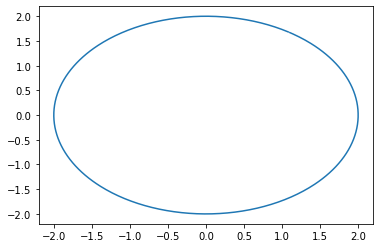

In [12]:
plot(x[2],y[2])

In [34]:
r1 = array([1,4,2,5,6])
t = linspace(0,2*pi, 200)

In [42]:
broadcast_to(r1,(len(r1),len(t)))*cos(broadcast_to(t,(len(r1),len(t))))

ValueError: operands could not be broadcast together with remapped shapes [original->remapped]: (5,) and requested shape (5,200)

In [46]:
broadcast_to(r1,(len(t),len(r1))).transpose()*cos(broadcast_to(t,(len(r1),len(t))))

array([[ 1.        ,  0.99950159,  0.99800685,  0.99551728,  0.99203536,
         0.98756455,  0.98210932,  0.9756751 ,  0.96826831,  0.95989632,
         0.95056749,  0.94029111,  0.92907743,  0.91693763,  0.9038838 ,
         0.88992896,  0.87508702,  0.85937278,  0.84280189,  0.82539088,
         0.8071571 ,  0.78811873,  0.76829475,  0.74770492,  0.72636975,
         0.70431053,  0.68154923,  0.65810855,  0.63401185,  0.60928316,
         0.58394711,  0.55802898,  0.53155459,  0.50455034,  0.47704314,
         0.44906041,  0.42063005,  0.3917804 ,  0.36254021,  0.33293864,
         0.30300518,  0.27276968,  0.24226228,  0.21151339,  0.18055365,
         0.14941394,  0.11812528,  0.08671888,  0.05522603,  0.02367813,
        -0.00789337, -0.039457  , -0.0709813 , -0.10243484, -0.13378628,
        -0.16500435, -0.19605795, -0.22691611, -0.25754807, -0.28792331,
        -0.31801154, -0.34778276, -0.37720731, -0.40625585, -0.43489943,
        -0.46310949, -0.49085791, -0.51811703, -0.5